<a href="https://colab.research.google.com/github/bhoomika-ethakota/basic-express/blob/main/MentalHealthPredictionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MACHINE LEARNING FOR MENTAL HEALTH PREDICTION


***Importing libraries***

In [ ]:
#importing the usual libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#importing libraries required for classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

#importing libraries required for model evaluation
from sklearn import metrics

#importing multiple libraries
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_curve,
                             roc_auc_score,
                             confusion_matrix)

In [ ]:
#clearing the warnings in Python
from warnings import filterwarnings
filterwarnings('ignore')

***Importing the Google Drive***

In [ ]:
#importing Google Drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


***Reading the dataset***

In [ ]:
#importing pandas library as pd
#reading the data using the pandas library
import pandas as pd
path="/content/survey.csv"
hs_data=pd.read_csv(path)
hs_data.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


***Describing the dataset***

In [ ]:
#describing the method to get an idea about mean, std for each column
hs_data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


***Concise summary of the dataset***

In [ ]:
#using the info() function to get a concise summary of the data
hs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

***Number of distinct observations***

In [ ]:
#using the nunique() function to get the number of unique elements in the object
hs_data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

***Cleaning the data***

In [ ]:
#clean 'Gender'
gender = hs_data['Gender'].str.lower()
print(gender)

#selecting unique elements
gender = hs_data['Gender'].unique()

#making gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in hs_data.iterrows():

    if str.lower(col.Gender) in male_str:
        hs_data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        hs_data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        hs_data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#removing unnecessary elements
stk_list = ['A little about you', 'p']
hs_data = hs_data[~hs_data['Gender'].isin(stk_list)]

print(hs_data['Gender'].unique())

0       female
1            m
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257         f
1258      male
Name: Gender, Length: 1259, dtype: object
['female' 'male' 'trans']


***Encoding data***

In [ ]:
#encoding data
labelDict = {}
for feature in hs_data:
    le = preprocessing.LabelEncoder()
    le.fit(hs_data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    hs_data[feature] = le.transform(hs_data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Timestamp ['2014-08-27 11:29:31', '2014-08-27 11:29:37', '2014-08-27 11:29:44', '2014-08-27 11:29:46', '2014-08-27 11:30:22', '2014-08-27 11:31:22', '2014-08-27 11:31:50', '2014-08-27 11:32:05', '2014-08-27 11:32:39', '2014-08-27 11:32:43', '2014-08-27 11:32:44', '2014-08-27 11:32:49', '2014-08-27 11:33:23', '2014-08-27 11:33:26', '2014-08-27 11:33:57', '2014-08-27 11:34:00', '2014-08-27 11:34:20', '2014-08-27 11:34:37', '2014-08-27 11:34:53', '2014-08-27 11:35:08', '2014-08-27 11:35:12', '2014-08-27 11:35:24', '2014-08-27 11:35:48', '2014-08-27 11:36:24', '2014-08-27 11:36:48', '2014-08-27 11:37:08', '2014-08-27 11:37:23', '2014-08-27 11:37:59', '2014-08-27 11:38:12', '2014-08-27 11:38:18', '2014-08-27 11:38:55', '2014-08-27 11:39:03', '2014-08-27 11:39:31', '2014-08-27 11:39:36', '2014-08-27 11:40:51', '2014-08-27 11:41:17', '2014-08-27 11:41:37', '2014-08-27 11:41:50', '2014-08-27 11:42:08', '2014-08-27 11:42:15', '2014-08-27 11:42:25', '2014-08-27 11:42:31', '2014-08-27 11:43

***Defining the columns***

In [ ]:
#defining the columns as categorical and continuous
cat_cols = ['self_employed','family_history','treatment','work_interfere','self_employed']
con_cols = ["Age"]

***Testing and training data***

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hs_data[con_cols] = scaler.fit_transform(hs_data[con_cols])

In [ ]:
#defining the feature input and the label input
#droping some fields
all_inputs = hs_data.drop(['no_employees', 'Timestamp', 'comments','state','treatment'], axis=1).values
#extracting the class labels
all_labels = hs_data['treatment'].values
#subset of the inputs looks like:
all_inputs[:100]

array([[ 6.76740765e-01,  0.00000000e+00,  4.40000000e+01, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [ 1.63269549e+00,  1.00000000e+00,  4.40000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.08403963e-03,  1.00000000e+00,  6.00000000e+00, ...,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [-1.42649001e-01,  1.00000000e+00,  2.50000000e+01, ...,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.30480921e-01,  1.00000000e+00,  4.40000000e+01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-2.79213961e-01,  1.00000000e+00,  4.40000000e+01, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00]])

In [ ]:
all_inputs

array([[ 6.76740765e-01,  0.00000000e+00,  4.40000000e+01, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [ 1.63269549e+00,  1.00000000e+00,  4.40000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.08403963e-03,  1.00000000e+00,  6.00000000e+00, ...,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.67045882e-01,  1.00000000e+00,  4.40000000e+01, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.90582541e+00,  0.00000000e+00,  4.40000000e+01, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-9.62038766e-01,  1.00000000e+00,  4.40000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
#spliting the data into training and testing.
#75% of the data is used for training, while 25% of the data is used for testing.
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=0)

In [ ]:
print('Shape for training data', training_inputs.shape, training_classes.shape)
print('Shape for testing data', testing_inputs.shape, testing_classes.shape)

Shape for training data (942, 22) (942,)
Shape for testing data (315, 22) (315,)


In [ ]:
x= hs_data['mental_health_consequence'].values
x.reshape(-1, 1)
x

array([1, 0, 1, ..., 2, 2, 0])

In [ ]:
y = hs_data['treatment'].values
y.reshape(-1, 1)
y

array([1, 0, 0, ..., 1, 0, 1])

******

***RandomForestClassifier***

Accuracy0.8134920634920635
F-1 Score0.8265682656826568
ROC score0.8134920634920635
ROC_AUC_SCORE:0.8134920634920635
Confusion matrix:[[ 93  33]
 [ 14 112]]


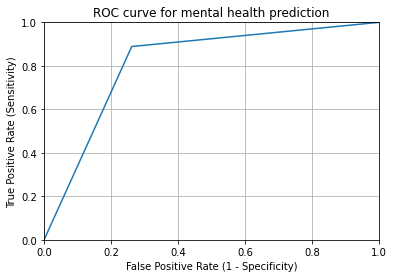

In [ ]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.20, random_state=1)
classifier=RandomForestClassifier ()
classifier.fit(training_inputs,training_classes)
pred=classifier.predict(testing_inputs)
print("Accuracy"+str(classifier.score(testing_inputs, testing_classes)))
print("F-1 Score"+str(f1_score(testing_classes, pred)))
print("ROC score"+str(roc_auc_score(testing_classes, pred)))
fpr_two,tpr_two,threshold_two=roc_curve(testing_classes, pred)
print("ROC_AUC_SCORE:"+str(roc_auc_score(testing_classes, pred)))
print("Confusion matrix:"+str(confusion_matrix(testing_classes, pred)))
plt.plot(fpr_two, tpr_two)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for mental health prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

***KNeighborsClassifier***

Text(0, 0.5, 'Accuracy')

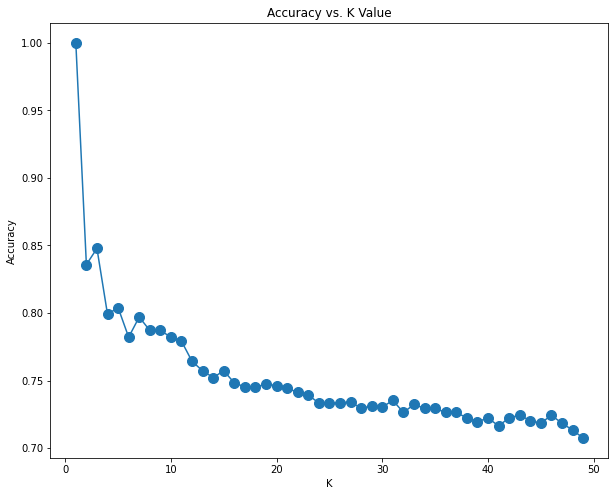

In [ ]:
accuracy = []

for i in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(training_inputs, training_classes)
    accuracy.append(classifier.score(training_inputs, training_classes))

plt.figure(figsize =(10, 8))
plt.plot(range(1, 50), accuracy, marker ='o', markersize = 10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')


Accuracy0.6984126984126984
F-1 Score0.7196969696969696
ROC score0.7063492063492063
ROC_AUC_SCORE:0.7063492063492063
Confusion matrix:[[83 43]
 [31 95]]


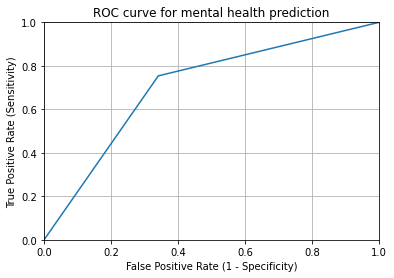

In [ ]:
pred=classifier.predict(testing_inputs)
fpr, tpr, thresholds = roc_curve(testing_classes, pred)
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(training_inputs, training_classes)
classifier.score(testing_inputs, testing_classes)
print("Accuracy"+str(classifier.score(testing_inputs, testing_classes)))
print("F-1 Score"+str(f1_score(testing_classes, pred)))
print("ROC score"+str(roc_auc_score(testing_classes, pred)))
print("ROC_AUC_SCORE:"+str(roc_auc_score(testing_classes, pred)))
print("Confusion matrix:"+str(confusion_matrix(testing_classes, pred)))
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for mental health prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

***LogisticRegression***

In [ ]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.20, random_state=1)
classifier=LogisticRegression()
classifier.fit(training_inputs,training_classes)
pred=classifier.predict(testing_inputs)
print("Accuracy"+str(classifier.score(testing_inputs, testing_classes)))
print("F-1 Score"+str(f1_score(testing_classes, pred)))
print("ROC score"+str(roc_auc_score(testing_classes, pred)))
fpr_one,tpr_one,threshold_one=roc_curve(testing_classes, pred)
print("ROC_AUC_SCORE:"+str(roc_auc_score(testing_classes, pred)))
print("Confusion matrix:"+str(confusion_matrix(testing_classes, pred)))

Accuracy0.753968253968254
F-1 Score0.7596899224806201
ROC score0.7539682539682541
ROC_AUC_SCORE:0.7539682539682541
Confusion matrix:[[92 34]
 [28 98]]


***DecisionTreeClassifier***

In [ ]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.20, random_state=0)
classifier=DecisionTreeClassifier ()
classifier.fit(training_inputs,training_classes)
pred=classifier.predict(testing_inputs)
print("Accuracy"+str(classifier.score(testing_inputs, testing_classes)))
print("F-1 Score"+str(f1_score(testing_classes, pred)))
print("ROC score"+str(roc_auc_score(testing_classes, pred)))

Accuracy0.7380952380952381
F-1 Score0.7421875
ROC score0.7388920400831915


***F1 SCORE***

In [ ]:
f1 = f1_score(testing_classes, pred)
print ("F1 Score : \n", f1)

F1 Score : 
 0.7421875


***Comparing models***

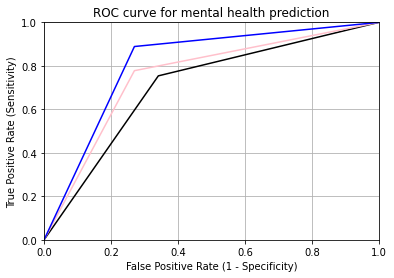

In [ ]:
plt.plot(fpr, tpr,color='black',label='KNeighborClassifier')
plt.plot(fpr_one, tpr_one,color='pink',label='LogisticRegression')
plt.plot(fpr_two, tpr_two,color='blue',label='RandomForestClassifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for mental health prediction')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# RandomForestClassifier performs better